# Supervised Machine Learning

In [20]:
#data mining
import os
import warnings
import pickle
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = 'C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/dataset/lag_data.csv'

#training
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_validate, LeaveOneGroupOut, HalvingGridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#selection
from mlxtend.evaluate import mcnemar_table, mcnemar
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

#interpretability
import shap

#deployment
from micromlgen import port

In [21]:
df = pd.read_csv(path)
df.drop('target_name', inplace=True, axis=1)
df.head()

,hr_maximum,hr_minimum,hr_abs_maximum,hr_abs_minimum,hr_mean,hr_abs_energy,hr_mean_abs_change,hr_cid_ce,temp_maximum,temp_minimum,temp_abs_maximum,temp_abs_minimum,temp_mean,temp_abs_energy,temp_mean_abs_change,temp_cid_ce,target,ID
0,0.44192,0.447531,0.44192,0.447531,0.469939,0.384935,0.052254,0.000717,0.944060,0.928227,0.944060,0.928227,0.937919,0.930941,0.160912,0.019084,0.0,0
1,0.44192,0.447658,0.44192,0.447658,0.471027,0.385993,0.053366,0.000725,0.944060,0.928227,0.944060,0.928227,0.937961,0.930987,0.160423,0.018968,0.0,0
2,0.44192,0.447722,0.44192,0.447722,0.472097,0.387034,0.054231,0.000729,0.944667,0.928227,0.944667,0.928227,0.937979,0.931007,0.160134,0.018899,0.0,0
3,0.44192,0.448104,0.44192,0.448104,0.473156,0.388064,0.054478,0.000730,0.944667,0.928227,0.944667,0.928227,0.938063,0.931100,0.159399,0.018748,0.0,0
4,0.44192,0.449060,0.44192,0.449060,0.474201,0.389080,0.054046,0.000727,0.948555,0.928227,0.948555,0.928227,0.938160,0.931207,0.159405,0.018749,0.0,0


In [22]:
X = df.drop(['target'], axis=1, inplace=False)
y = df.target
group = df.ID

In [23]:
false = (y == 0).sum()
true = (y == 1).sum()

print(false)
print(true)

18765
11176


## Hyperparameter Optimization

### Logistic Regression

In [24]:
parameters_logreg = {'penalty':('l1', 'l2', 'elasticnet'), 
                     'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
                     'C': np.logspace(-3, 0, 10)}
logreg = LogisticRegression(random_state=46, class_weight = 'balanced')
cv = LeaveOneGroupOut()
logreg_hyperparams = HalvingGridSearchCV(logreg, parameters_logreg, cv = cv, scoring = 'f1_weighted', random_state=46, verbose=3)
logreg_hyperparams.fit(X, y, groups = group)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 369
max_resources_: 29941
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 180
n_resources: 369
Fitting 15 folds for each of 180 candidates, totalling 2700 fits
[CV 1/15] END C=0.001, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/15] END C=0.001, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/15] END C=0.001, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/15] END C=0.001, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/15] END C=0.001, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/15] END C=0.001, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/15] END C=0.001, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/15] END C=0.001, penalty=l1, solver=lbfgs;, scor

[CV 1/15] END C=0.001, penalty=l1, solver=liblinear;, score=(train=0.444, test=0.495) total time=   0.0s
[CV 2/15] END C=0.001, penalty=l1, solver=liblinear;, score=(train=0.510, test=0.381) total time=   0.0s
[CV 3/15] END C=0.001, penalty=l1, solver=liblinear;, score=(train=0.486, test=0.358) total time=   0.0s
[CV 4/15] END C=0.001, penalty=l1, solver=liblinear;, score=(train=0.483, test=0.656) total time=   0.0s
[CV 5/15] END C=0.001, penalty=l1, solver=liblinear;, score=(train=0.517, test=0.381) total time=   0.0s
[CV 6/15] END C=0.001, penalty=l1, solver=liblinear;, score=(train=0.517, test=0.381) total time=   0.0s
[CV 7/15] END C=0.001, penalty=l1, solver=liblinear;, score=(train=0.482, test=0.358) total time=   0.0s
[CV 8/15] END C=0.001, penalty=l1, solver=liblinear;, score=(train=0.483, test=0.550) total time=   0.0s
[CV 9/15] END C=0.001, penalty=l1, solver=liblinear;, score=(train=0.454, test=0.450) total time=   0.0s
[CV 10/15] END C=0.001, penalty=l1, solver=liblinear;, 

HalvingGridSearchCV(cv=LeaveOneGroupOut(),
                    estimator=LogisticRegression(class_weight='balanced',
                                                 random_state=46),
                    param_grid={'C': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                                'penalty': ('l1', 'l2', 'elasticnet'),
                                'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                           'newton-cholesky', 'sag', 'saga')},
                    random_state=46, scoring='f1_weighted', verbose=3)

In [25]:
print(logreg_hyperparams.best_params_)
print(logreg_hyperparams.best_score_)

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.938767758108484


In [26]:
logreg = logreg_hyperparams.best_estimator_

### Random Forest

In [28]:
parameters_rf = {'n_estimators': [5, 10, 20, 30],
               'max_depth': [5, 10, 20, 30],
               'min_samples_split': [2, 5, 10]}
rf = RandomForestClassifier(random_state=46, class_weight= 'balanced')
rf_hyperparams = HalvingGridSearchCV(rf, parameters_rf, cv = cv, scoring = 'f1_weighted', random_state=46, verbose=3)
rf_hyperparams.fit(X, y, group)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 1108
max_resources_: 29941
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 48
n_resources: 1108
Fitting 15 folds for each of 48 candidates, totalling 720 fits
[CV 1/15] END max_depth=5, min_samples_split=2, n_estimators=5;, score=(train=0.986, test=0.454) total time=   0.0s
[CV 2/15] END max_depth=5, min_samples_split=2, n_estimators=5;, score=(train=0.995, test=0.945) total time=   0.0s
[CV 3/15] END max_depth=5, min_samples_split=2, n_estimators=5;, score=(train=0.985, test=0.986) total time=   0.0s
[CV 4/15] END max_depth=5, min_samples_split=2, n_estimators=5;, score=(train=0.995, test=0.987) total time=   0.0s
[CV 5/15] END max_depth=5, min_samples_split=2, n_estimators=5;, score=(train=0.993, test=0.852) total time=   0.0s
[CV 6/15] END max_depth=5, min_samples_split=2, n_estimators=5;, score=(train=0.991, test=0.986) total time=   0.0s
[CV 7/15] END max_depth=5, min_samples

HalvingGridSearchCV(cv=LeaveOneGroupOut(),
                    estimator=RandomForestClassifier(class_weight='balanced',
                                                     random_state=46),
                    param_grid={'max_depth': [5, 10, 20, 30],
                                'min_samples_split': [2, 5, 10],
                                'n_estimators': [5, 10, 20, 30]},
                    random_state=46, scoring='f1_weighted', verbose=3)

In [29]:
print(rf_hyperparams.best_params_)
print(rf_hyperparams.best_score_)

{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 10}
0.8970483852271778


In [30]:
rf = rf_hyperparams.best_estimator_

### Gaussian NB

In [31]:
parameters_gnb = {'var_smoothing': np.logspace(-9, 9, 100)}
gnb = GaussianNB()
gnb_hyperparams = HalvingGridSearchCV(gnb, parameters_gnb, cv = cv, scoring = 'f1_weighted', random_state=46, verbose=3)
gnb_hyperparams.fit(X, y, groups = group)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 369
max_resources_: 29941
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 100
n_resources: 369
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
[CV 1/15] END var_smoothing=1e-09;, score=(train=0.788, test=0.367) total time=   0.0s
[CV 2/15] END var_smoothing=1e-09;, score=(train=0.721, test=0.450) total time=   0.0s
[CV 3/15] END var_smoothing=1e-09;, score=(train=0.840, test=0.774) total time=   0.0s
[CV 4/15] END var_smoothing=1e-09;, score=(train=0.719, test=0.529) total time=   0.0s
[CV 5/15] END var_smoothing=1e-09;, score=(train=0.718, test=0.875) total time=   0.0s
[CV 6/15] END var_smoothing=1e-09;, score=(train=0.713, test=0.747) total time=   0.0s
[CV 7/15] END var_smoothing=1e-09;, score=(train=0.797, test=0.822) total time=   0.0s
[CV 8/15] END var_smoothing=1e-09;, score=(train=0.742, test=0.796) total time=   0.0s
[CV 9/15] END var_smoothing=1e-09;, s

HalvingGridSearchCV(cv=LeaveOneGroupOut(), estimator=GaussianNB(),
                    param_grid={'var_smoothing': array([1.00000000e-09, 1.51991108e-09, 2.31012970e-09, 3.51119173e-09,
       5.33669923e-09, 8.11130831e-09, 1.23284674e-08, 1.87381742e-08,
       2.84803587e-08, 4.32876128e-08, 6.57933225e-08, 1.00000000e-07,
       1.51991108e-07, 2.31012970e-07, 3.51119173e-07, 5.33669923e-07,
       8.11130831...
       3.51119173e+05, 5.33669923e+05, 8.11130831e+05, 1.23284674e+06,
       1.87381742e+06, 2.84803587e+06, 4.32876128e+06, 6.57933225e+06,
       1.00000000e+07, 1.51991108e+07, 2.31012970e+07, 3.51119173e+07,
       5.33669923e+07, 8.11130831e+07, 1.23284674e+08, 1.87381742e+08,
       2.84803587e+08, 4.32876128e+08, 6.57933225e+08, 1.00000000e+09])},
                    random_state=46, scoring='f1_weighted', verbose=3)

In [32]:
print(gnb_hyperparams.best_params_)
print(gnb_hyperparams.best_score_)

{'var_smoothing': 2.310129700083158e-09}
0.6937254660066979


In [33]:
gnb = gnb_hyperparams.best_estimator_

### Extreme Gradient Boosting

In [34]:
parameters_xgb = {'booster': ['gbtree', 'gblinear', 'dart'], 
                  'lambda': np.logspace(-3, 0, 3),
                  'alpha': np.logspace(-3, 0, 3),
                  'eta': np.logspace(-3, 0, 3)}
xgb = XGBClassifier(scale_pos_weight = false/true, objective = 'binary:logistic')
xgb_hyperparams = HalvingGridSearchCV(xgb, parameters_xgb, cv = cv, scoring = 'f1_weighted', random_state=46, verbose=3)
xgb_hyperparams.fit(X, y, groups = group)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 369
max_resources_: 29941
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 81
n_resources: 369
Fitting 15 folds for each of 81 candidates, totalling 1215 fits
[CV 1/15] END alpha=0.001, booster=gbtree, eta=0.001, lambda=0.001;, score=(train=0.988, test=1.000) total time=   0.1s
[CV 2/15] END alpha=0.001, booster=gbtree, eta=0.001, lambda=0.001;, score=(train=0.988, test=0.917) total time=   0.1s
[CV 3/15] END alpha=0.001, booster=gbtree, eta=0.001, lambda=0.001;, score=(train=0.988, test=0.957) total time=   0.0s
[CV 4/15] END alpha=0.001, booster=gbtree, eta=0.001, lambda=0.001;, score=(train=0.988, test=1.000) total time=   0.0s
[CV 5/15] END alpha=0.001, booster=gbtree, eta=0.001, lambda=0.001;, score=(train=0.991, test=0.831) total time=   0.0s
[CV 6/15] END alpha=0.001, booster=gbtree, eta=0.001, lambda=0.001;, score=(train=0.988, test=1.000) total time=   0.1s
[CV 7/15] END a

HalvingGridSearchCV(cv=LeaveOneGroupOut(),
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...),
                    param_grid={'alpha': array([0.001     , 0.03162278, 1.        ]),
                                'booster': ['gbtree', 'gblinear', 'dart'],
                                'eta': array([0.001     , 0.03162278, 1.        ]),
                                'lambda': array([0.001     , 0.03162278, 1.        ])},
                    random_state=46, scoring='f1_weighted', verbose=3)

In [35]:
print(xgb_hyperparams.best_params_)
print(xgb_hyperparams.best_score_)

{'alpha': 0.001, 'booster': 'gbtree', 'eta': 1.0, 'lambda': 0.001}
0.912165513557384


In [ ]:
xgb = xgb_hyperparams.best_estimator_

## Model Selection

###### https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

### Metrics 

In [36]:
def run_exps(X: pd.DataFrame , y: pd.DataFrame, ID: pd.DataFrame) -> pd.DataFrame:
        '''
        Lightweight script to test many models and find winners
        :param X: features
        :param y: target
        :param ID: grouping variable for LOSO cross-validation
        :return: DataFrame of predictions
        '''
    
        dfs = []
        models = [
               ('LogReg', logreg_hyperparams.best_estimator_), 
               ('RF', rf_hyperparams.best_estimator_),
               ('GNB', gnb_hyperparams.best_estimator_),
               ('XGB', xgb_hyperparams.best_estimator_)
               ]
        results = []
        names = []
        scoring = ['balanced_accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
        target_names = ['no-anxiety', 'anxiety']
        for name, model in models:
                cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, groups = ID)
                y_pred = cross_val_predict(model, X, y, cv=cv, groups = ID)
                print(name)
                print(classification_report(y, y_pred, target_names=target_names))
                results.append(cv_results)
                names.append(name)
                this_df = pd.DataFrame(cv_results)
                this_df['model'] = name
                dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
        return final

In [37]:
final = run_exps(X=X, y=y, ID=group)

LogReg
              precision    recall  f1-score   support

  no-anxiety       0.97      0.93      0.95     18765
     anxiety       0.90      0.95      0.92     11176

    accuracy                           0.94     29941
   macro avg       0.93      0.94      0.94     29941
weighted avg       0.94      0.94      0.94     29941

RF
              precision    recall  f1-score   support

  no-anxiety       0.91      0.95      0.93     18765
     anxiety       0.90      0.84      0.87     11176

    accuracy                           0.91     29941
   macro avg       0.91      0.90      0.90     29941
weighted avg       0.91      0.91      0.91     29941

GNB
              precision    recall  f1-score   support

  no-anxiety       0.84      0.69      0.76     18765
     anxiety       0.60      0.79      0.68     11176

    accuracy                           0.72     29941
   macro avg       0.72      0.74      0.72     29941
weighted avg       0.75      0.72      0.73     29941

XGB
 

### Visualization

In [38]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=10, replace=True, random_state=46)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

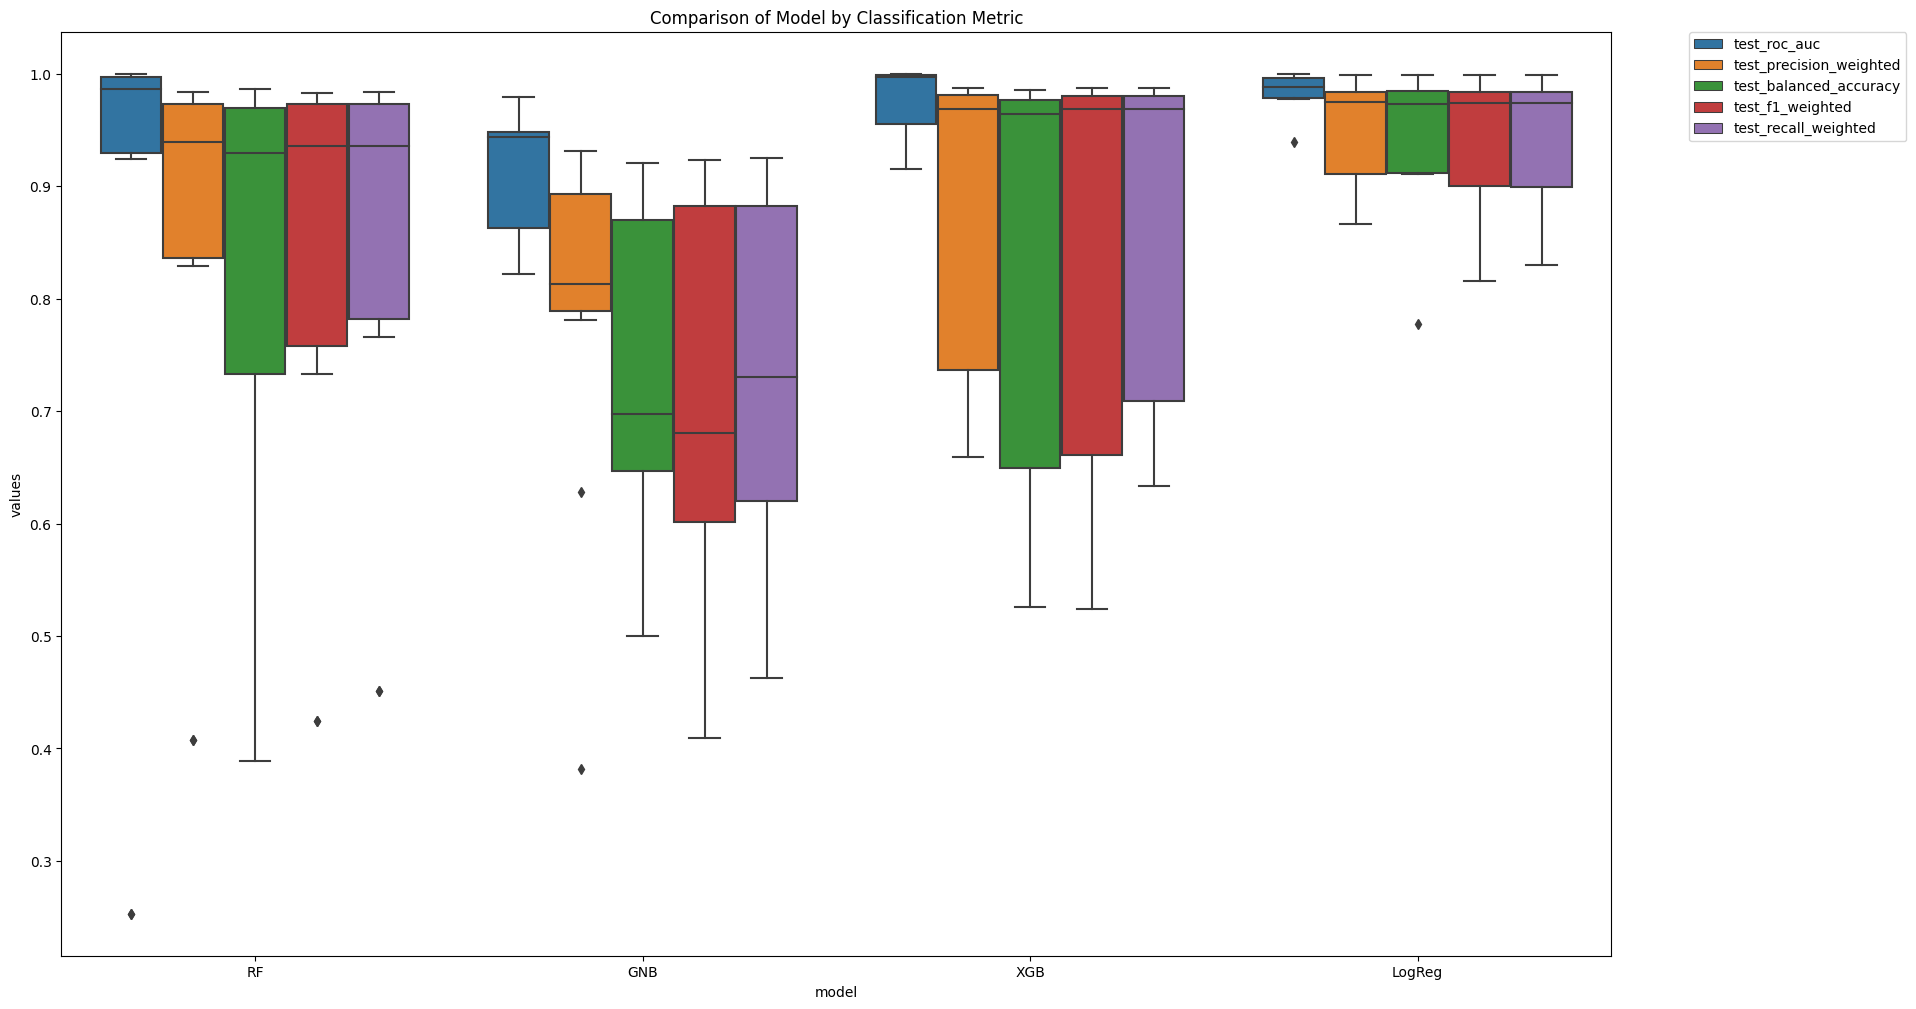

In [39]:
plt.figure(figsize=(20, 12))
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.show()

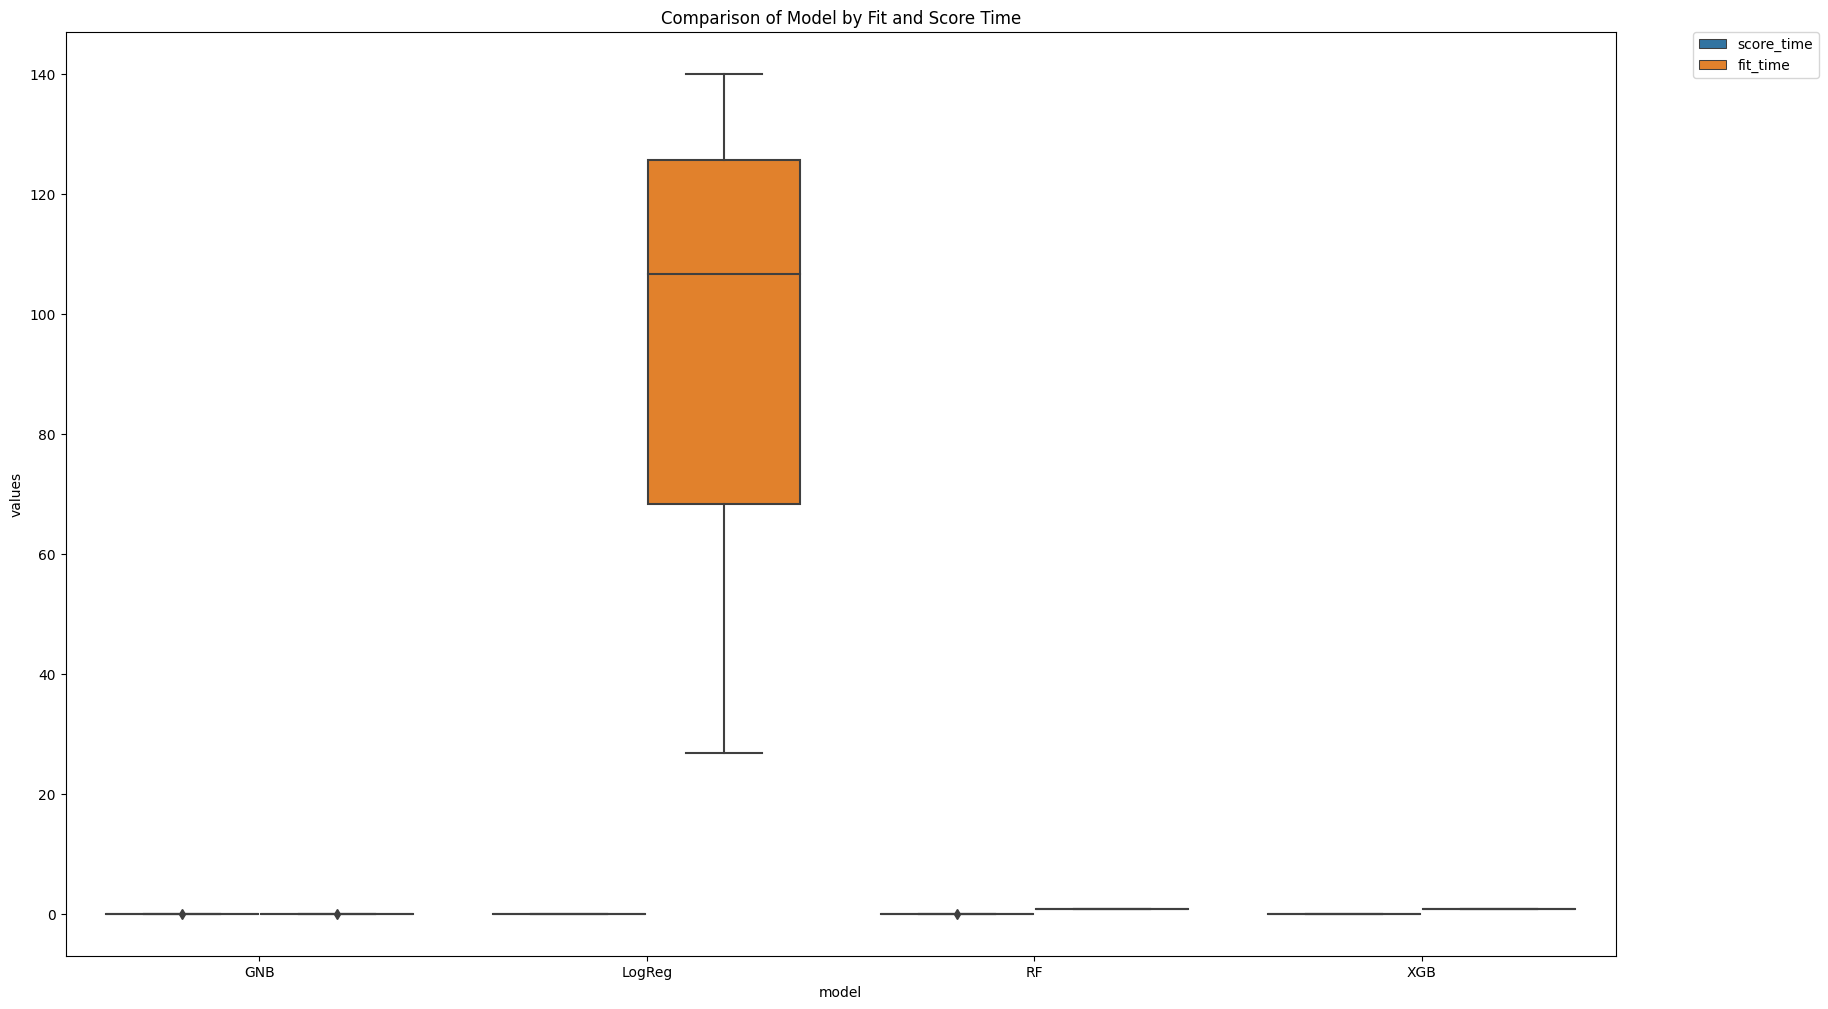

In [40]:
plt.figure(figsize=(20, 12))
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.show()

### Comparison

In [41]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_roc_auc           test_f1_weighted            \
                std      mean              std      mean   
model                                                      
GNB        0.059756  0.914567         0.185115  0.701352   
LogReg     0.018029  0.984225         0.060238  0.941920   
RF         0.307230  0.834022         0.222987  0.819738   
XGB        0.030217  0.976915         0.202831  0.835196   

       test_precision_weighted           test_recall_weighted            \
                           std      mean                  std      mean   
model                                                                     
GNB                   0.167013  0.782733             0.157099  0.734207   
LogReg                0.046155  0.950771             0.057403  0.942903   
RF                    0.228602  0.829122             0.210987  0.828205   
XGB                   0.145709  0.875150             0.157514  0.863454   

       test_balanced_accuracy            
                          std      mean  
model                                    
GNB                  0.149215  0.724588  
LogReg               0.067505  0.941413  
RF                   0.237660  0.808168  
XGB                  0.204160  0.834063

In [42]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time             fit_time           
              std      mean        std       mean
model                                            
GNB      0.001387  0.020254   0.001159   0.022681
LogReg   0.009717  0.031297  36.378952  96.034527
RF       0.002597  0.023786   0.023855   0.804588
XGB      0.001586  0.037449   0.014776   0.779592

### Confusion Matrix

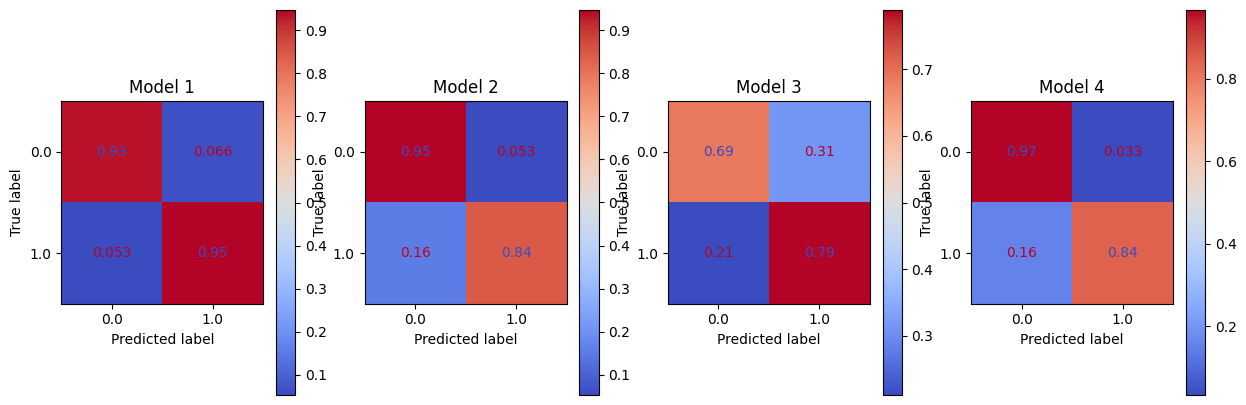

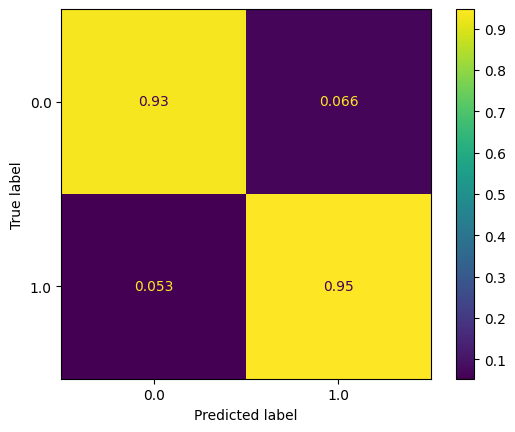

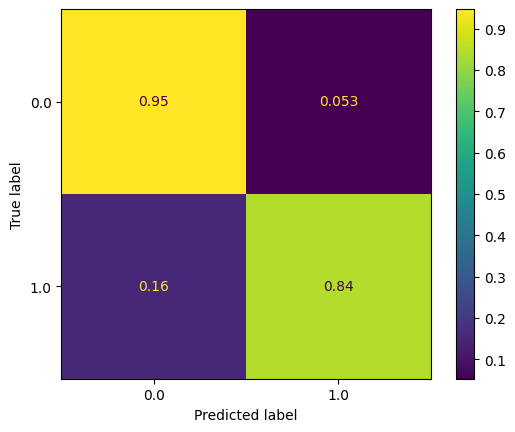

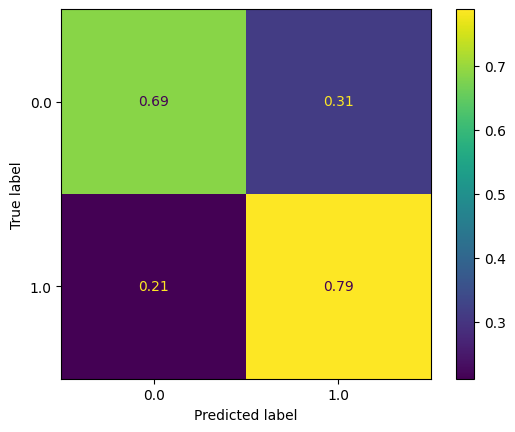

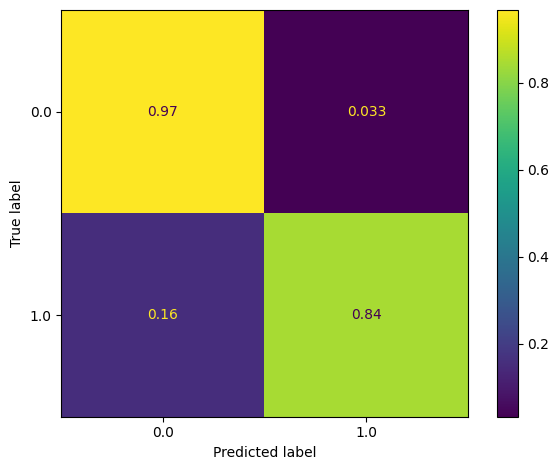

In [43]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, clf in enumerate([logreg_hyperparams.best_estimator_, rf_hyperparams.best_estimator_, gnb_hyperparams.best_estimator_, xgb_hyperparams.best_estimator_]):
    prediction = cross_val_predict(clf, X, y, cv=cv, groups=group)
    disp = ConfusionMatrixDisplay.from_predictions(y, prediction, display_labels=np.unique(y), normalize='true')
    disp.plot(ax=axes[i], colorbar=True, cmap='coolwarm')
    disp.ax_.set_title(f"Model {i+1}")

plt.tight_layout()
#plt.show()

### McNemar's Test

In [44]:
logreg_pred = cross_val_predict(logreg, X, y, cv=cv, groups=group)
xgb_pred = cross_val_predict(xgb, X, y, cv=cv, groups=group)

In [45]:
tb = mcnemar_table(y_target=y, 
                   y_model1=logreg_pred, 
                   y_model2=xgb_pred )

print(tb)

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)

[[26535  1580]
 [ 1081   745]]
chi-squared: 93.19954904171364
p-value: 4.727888564316315e-22


### Interpretability

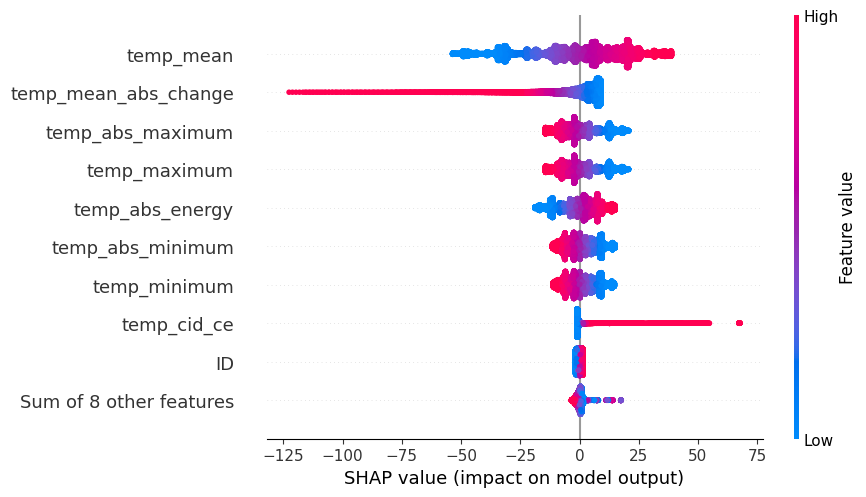

In [48]:
explainer = shap.Explainer(logreg, X)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

## Deploy

In [46]:
if __name__ == '__main__':
    classmap = {
        0: 'Baseline',
        1: 'Stress'
    }
    c_code = port(logreg_hyperparams.best_estimator_, classmap=classmap)

    with open('C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/codes/arduinocode/Final_code/Classifier.h', 'w') as file:
        file.write(c_code)

In [47]:
filename = 'C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/codes/ML and DL - Python/ML/classifier.sav'
pickle.dump(logreg_hyperparams.best_estimator_, open(filename, 'wb'))

In [4]:
model = pickle.load(open(filename, 'rb'))